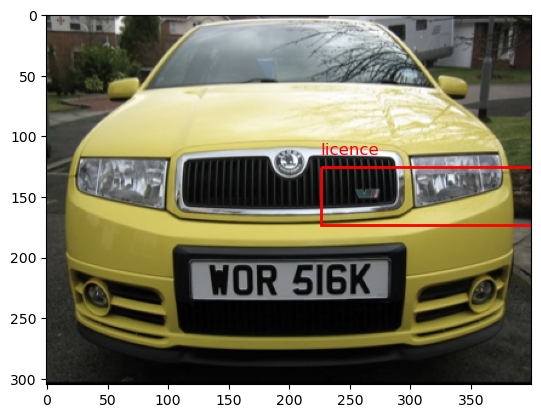

In [8]:
import os
import xml.etree.ElementTree as ET
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Set paths to your images and annotations directories
images_dir = os.path.join('..', 'data', 'images')
annotations_dir = os.path.join('..', 'data', 'annotations')

# Function to parse XML and extract bounding box coordinates and labels
def parse_annotation(xml_file):
    tree = ET.parse(xml_file)
    root = tree.getroot()
    bboxes = []
    for member in root.findall('object'):
        bndbox = member.find('bndbox')
        bbox = {
            'xmin': int(bndbox.find('xmin').text),
            'ymin': int(bndbox.find('ymin').text),
            'xmax': int(bndbox.find('xmax').text),
            'ymax': int(bndbox.find('ymax').text),
            'label': member.find('name').text
        }
        bboxes.append(bbox)
    return bboxes

# Function to load an image and plot it with bounding boxes
def plot_image_with_bboxes(image_path, bboxes):
    img = Image.open(image_path)
    fig, ax = plt.subplots(1)
    ax.imshow(img)
    
    for bbox in bboxes:
        rect = patches.Rectangle((bbox['xmin'], bbox['ymin']), bbox['xmax'] - bbox['xmin'], bbox['ymax'] - bbox['ymin'], linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
        plt.text(bbox['xmin'], bbox['ymin']-10, bbox['label'], color='red', fontsize=12)
    
    plt.show()

# Test with a sample image and its corresponding annotation
sample_image = os.path.join(images_dir, 'Cars11.png')
sample_annotation = os.path.join(annotations_dir, 'Cars0.xml')

# Parse the annotation and plot the image with bounding boxes
bboxes = parse_annotation(sample_annotation)
plot_image_with_bboxes(sample_image, bboxes)
